# BEMM458J Final assignment

## You are a business analyst at the marketing department of Coca Cola. There is an increasing debate on social media in relation to the negative impact of plastic consumption on the environment.

## As of recently NGOs have started campaigning against Coca Cola and other multinationals. 

## General management needs you to conduct an analysis of recent conversations posted on Twitter for the purposes of determining the communication strategies followed by NGOs and how Coca Cola must engage on social media.

In [1]:
import pandas as pd

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.options.display.max_colwidth = 400

In [4]:


ConversationsLean=pd.read_csv('../data/ConversationsLean.csv')

In [5]:
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [6]:
ConversationsLean.iloc[50]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                   4
tweet.created_at                                                                                                                                                                                                                                                                                                                                                                                                    2019-12-17 19:50:37.000000
tweet.id                                                                                                                                  

In [7]:
ConversationsLean.sample(3)

Unnamed: 0            tweet.created_at      tweet.id  \
142          96  2018-06-25 21:47:24.000000  1.011365e+18   
188         142  2016-05-07 17:22:31.000000  7.289985e+17   
135          89  2019-04-03 00:30:28.000000  1.113237e+18   

                                                                                                                                                                                                                                         tweet.full_text  \
142  What's YOUR Story of Plastic? \n\nSNEAK PEEK! #breakfreefromplastic changemaker Bharati Chaturvedi from Chintan Environmental Research and Action Group discusses why we MUST reduce plastic waste in the Story of Plastic. https://t.co/NZYVjMtH0X   
188                                                                                                          Living #plasticfree develops creativity and ingenuity in discovering alternatives to plastic.  It's actually fun! #wastedialog @bewastewise   
135    ‚ÄúThe truth that companies don‚Äôt want you to hear is that relying entirely on recycling without reduction just won‚Äôt work when it comes to the plastics crisis.‚Äù @wellsleybrown #TEDxMidAtlantic2019 #breakfreefromplastic https://t.co/wxdBa0rhW8   

                                                                                                                                                                                                                                                                                                                                                                                                      tweet.entities  \
142                                                                                                         {'hashtags': [{'text': 'breakfreefromplastic', 'indices': [44, 65]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NZYVjMtH0X', 'expanded_url': 'https://www.facebook.com/5gyres/videos/690977474567050/', 'display_url': 'facebook.com/5gyres/videos/‚Ä¶', 'indices': [218, 241]}]}   
188                                                                                                                              {'hashtags': [{'text': 'plasticfree', 'indices': [7, 19]}, {'text': 'wastedialog', 'indices': [114, 126]}], 'symbols': [], 'user_mentions': [{'screen_name': 'bewastewise', 'name': 'be Waste Wise', 'id': 1360495946, 'id_str': '1360495946', 'indices': [127, 139]}], 'urls': []}   
135  {'hashtags': [{'text': 'TEDxMidAtlantic2019', 'indices': [175, 195]}, {'text': 'breakfreefromplastic', 'indices': [196, 217]}], 'symbols': [], 'user_mentions': [{'screen_name': 'wellsleybrown', 'name': 'Wellsley Brown', 'id': 989955443899461633, 'id_str': '989955443899461633', 'indices': [160, 174]}], 'urls': [{'url': 'https://t.co/wxdBa0rhW8', 'expanded_url': 'http://bit.ly/2uIr9x8', 'display...   

     tweet.user.id tweet.user.screen_name  tweet.user.followers_count  \
142       85732762                 5gyres                       24165   
188       15071040        PlasticfreeBeth                       11649   
135       85732762                 5gyres                       24165   

     tweet.user.friends_count  tweet.user.favourites_count  ...      love  \
142                      4022                         2025  ...  0.053243   
188                      1469                         1371  ...  0.364808   
135                      4022                         2025  ...  0.012682   

      sadness     trust  identity_hate    insult   obscene severe_toxic  \
142  0.235865  0.057698       0.002072  0.003020  0.002872     0.001974   
188  0.061242  0.119314       0.002066  0.003232  0.002935     0.001934   
135  0.327526  0.028101       0.002228  0.003090  0.002842     0.001847   

       threat     toxic  stakeholder  
142  0.001919  0.007219          NGO  
188  0.001958  0.008275       Artist  
135  0.001950  0.007778          NGO  

[3 rows x 31 columns]

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
ConversationsLean.groupby('stakeholder').count()

Unnamed: 0  tweet.created_at  tweet.id  tweet.full_text  \
stakeholder                                                                 
Artist                   104               104       104              104   
Multinational             20                20        20               20   
NGO                      241               241       241              241   
OtherInstitution          51                51        51               51   
Scientific                24                24        24               24   

                  tweet.entities  tweet.user.id  tweet.user.screen_name  \
stakeholder                                                               
Artist                       104            104                     104   
Multinational                 20             20                      20   
NGO                          241            241                     241   
OtherInstitution              51             51                      51   
Scientific                    24             24                      24   

                  tweet.user.followers_count  tweet.user.friends_count  \
stakeholder                                                              
Artist                                   104                       104   
Multinational                             20                        20   
NGO                                      241                       241   
OtherInstitution                          51                        51   
Scientific                                24                        24   

                  tweet.user.favourites_count  tweet.user.statuses_count  \
stakeholder                                                                
Artist                                    104                        104   
Multinational                              20                         20   
NGO                                       241                        241   
OtherInstitution                           51                         51   
Scientific                                 24                         24   

                  tweet.retweet_count  tweet.favorite_count  tweet.favorited  \
stakeholder                                                                    
Artist                            104                   104              104   
Multinational                      20                    20               20   
NGO                               241                   241              241   
OtherInstitution                   51                    51               51   
Scientific                         24                    24               24   

                  tweet.retweeted  tweet.lang  fetchedAt  \
stakeholder                                                
Artist                        104         104        104   
Multinational                  20          20         20   
NGO                           241         241        241   
OtherInstitution               51          51         51   
Scientific                     24          24         24   

                  tweet.full_text_clean  anger  fear  joy  love  sadness  \
stakeholder                                                                
Artist                              104    104   104  104   104      104   
Multinational                        20     20    20   20    20       20   
NGO                                 241    241   241  241   241      241   
OtherInstitution                     51     51    51   51    51       51   
Scientific                           24     24    24   24    24       24   

                  trust  identity_hate  insult  obscene  severe_toxic  threat  \
stakeholder                                                                     
Artist              104            104     104      104           104     104   
Multinational        20             20      20       20            20      20   
NGO                 241            241     241      241      

In [10]:
import seaborn as sns

## Task 1. Which Twitter users are the most popular ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider retweet and favorite counts as proxies for popularity

In [11]:
#There are different ways to determine which users are the most popular. I will look at three parameter to measure popoularity: 
# followers, 
# retweets
# favourites

#I will examine which users have the most followers, retweets and favourites. Once they are in an ascending order I will give the top 10 of
#each and determine which users have the most pupolarity.

In [12]:
#I first looked at the users with the most followers. 

In [13]:
most_followers=ConversationsLean.groupby('tweet.user.screen_name')['tweet.user.followers_count']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)                             

In [14]:
most_followers

tweet.user.screen_name      max
9              Greenpeace  1875552
16                PepsiCo   341175
13                 Nestle   257497
21               Unilever   214875
20         SongsofJBrowne    69322

In [15]:
#I then plotted the users with most followers

Text(0.5, 1.0, 'Users with most followers')

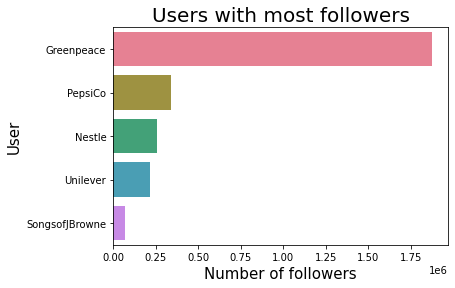

In [16]:
followersplot= sns.barplot(x="max", y="tweet.user.screen_name", 
                data=most_followers,
                palette="husl")
followersplot.set_xlabel("Number of followers", fontsize=15),
followersplot.set_ylabel("User", fontsize=15),
followersplot.set_title("Users with most followers", fontsize=20)

In [17]:
#I then looked at the users with the most retweeted tweets

In [18]:
most_retweets=ConversationsLean.groupby('tweet.user.screen_name')['tweet.retweet_count']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5) 

In [19]:
most_retweets

tweet.user.screen_name     max
18        PlasticPollutes  1074.0
9              Greenpeace   840.0
2                Algalita   302.0
14        NoPlasticStraws   144.0
0                  5gyres   131.0

In [20]:
#I then plotted the most retweeted tweet per user

Text(0.5, 1.0, 'Users with the most retweeted tweet')

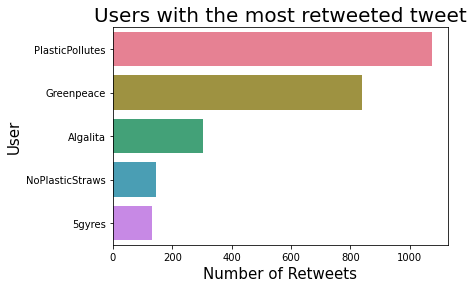

In [21]:
retweetsplot= sns.barplot(x="max", y="tweet.user.screen_name", data=most_retweets,
                        palette="husl")
retweetsplot.set_xlabel("Number of Retweets", fontsize=15),
retweetsplot.set_ylabel("User", fontsize=15),
retweetsplot.set_title("Users with the most retweeted tweet", fontsize=20)

In [22]:
#And then I considered which ones had the most retweets in average to see if the were users consistent between the ones with the most popular
#tweet and accross them all.

In [23]:
average_retweets=ConversationsLean.groupby('tweet.user.screen_name')['tweet.retweet_count']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [24]:
average_retweets

tweet.user.screen_name        mean
9              Greenpeace  179.136364
2                Algalita   38.571429
18        PlasticPollutes   33.401575
21               Unilever   27.750000
27          janettewallis   26.500000

In [25]:
#I then plotted the most retweeted user

Text(0.5, 1.0, 'Users with the most retweets')

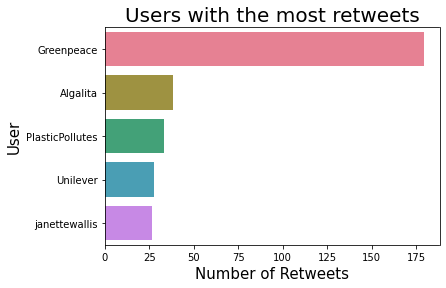

In [26]:
averageretweetsplot= sns.barplot(x="mean", y="tweet.user.screen_name", data=average_retweets,
                        palette="husl")
averageretweetsplot.set_xlabel("Number of Retweets", fontsize=15),
averageretweetsplot.set_ylabel("User", fontsize=15),
averageretweetsplot.set_title("Users with the most retweets", fontsize=20)

In [27]:
#We can see that Greenpeace, Algaita and Plastic Polutes are still in the top 3 of users with the most retweets, but in a different order.

In [28]:
#I then looked at the users with the most favourites in a tweet

In [29]:
most_favourites=ConversationsLean.groupby('tweet.user.screen_name')['tweet.favorite_count']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5) 

In [30]:
most_favourites

tweet.user.screen_name     max
9              Greenpeace  1236.0
13                 Nestle   345.0
18        PlasticPollutes   274.0
21               Unilever    87.0
22                WRAP_UK    71.0

In [31]:
#I then plotted the most favourited tweet per user

Text(0.5, 1.0, 'Users with most favourites')

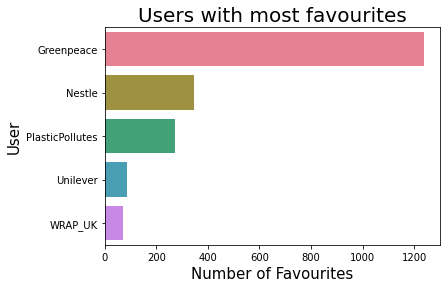

In [32]:
favoritesplot= sns.barplot(x="max", y="tweet.user.screen_name", data=most_favourites,
                        palette="husl")
favoritesplot.set_xlabel("Number of Favourites", fontsize=15),
favoritesplot.set_ylabel("User", fontsize=15),
favoritesplot.set_title("Users with most favourites", fontsize=20)

In [33]:
#And then I considered which users had the most favourites in average to see if the were users consistent between the ones with the most 
#popular tweet and accross them all.

In [34]:
average_favourites=ConversationsLean.groupby('tweet.user.screen_name')['tweet.favorite_count']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [35]:
average_favourites

tweet.user.screen_name        mean
9              Greenpeace  288.954545
13                 Nestle   57.333333
21               Unilever   53.750000
16                PepsiCo   38.500000
25         celinecousteau   36.000000

In [36]:
#I then plotted the users with most favourites in average

Text(0.5, 1.0, 'Users with most favourites in average')

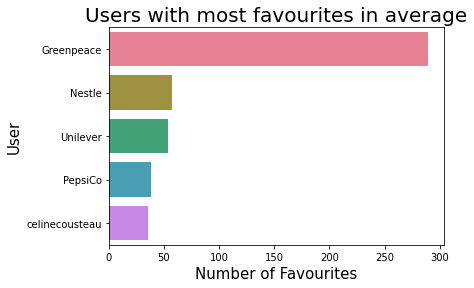

In [37]:
averagefavoritesplot= sns.barplot(x="mean", y="tweet.user.screen_name", data=average_favourites,
                        palette="husl")
averagefavoritesplot.set_xlabel("Number of Favourites", fontsize=15),
averagefavoritesplot.set_ylabel("User", fontsize=15),
averagefavoritesplot.set_title("Users with most favourites in average", fontsize=20)

In [38]:
#We can see that Greenpeace and Nestle are still the two most favourited users, nevertheless Plastic Polutes is not part of the top 5, bringing
#Unilever to the 3rd place in verage.

In [39]:
#I noticed that the plots above were not necessarilly ready to be handed in to management as their scales were completely different, making
#hacerder to compare. So I decided to re-do the plots with scales that were easier to compare.

[(-1.0, 5.0),
 (0.0, 2000000.0)]

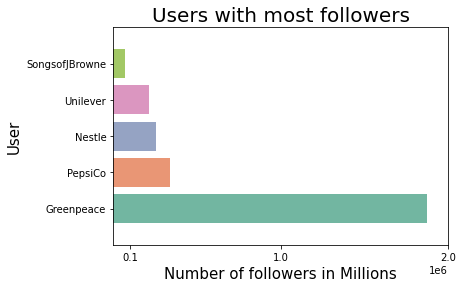

In [40]:
followersplot= sns.barplot(x="max", y="tweet.user.screen_name", 
                data=most_followers,
                palette="Set2")
followersplot.set_xlabel("Number of followers in Millions", fontsize=15),
followersplot.set_ylabel("User", fontsize=15),
followersplot.set_title("Users with most followers", fontsize=20)
followersplot.set(xlim=(0, 2000000),ylim=(-1, 5), xticks=[100000, 1000000, 2000000])


[(-1.0, 5.0),
 (0.0, 1500.0)]

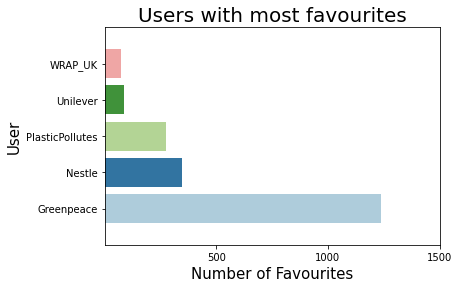

In [41]:
favoritesplot= sns.barplot(x="max", y="tweet.user.screen_name", data=most_favourites,
                        palette="Paired")
favoritesplot.set_xlabel("Number of Favourites", fontsize=15),
favoritesplot.set_ylabel("User", fontsize=15),
favoritesplot.set_title("Users with most favourites", fontsize=20)
favoritesplot.set(xlim=(0, 1500),ylim=(-1, 5), xticks=[500, 1000, 1500])

[(-1.0, 5.0),
 (0.0, 1500.0)]

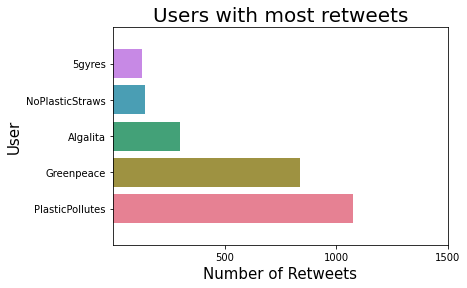

In [42]:
retweetsplot= sns.barplot(x="max", y="tweet.user.screen_name", data=most_retweets,
                        palette="husl")
retweetsplot.set_xlabel("Number of Retweets", fontsize=15),
retweetsplot.set_ylabel("User", fontsize=15),
retweetsplot.set_title("Users with most retweets", fontsize=20)
retweetsplot.set(xlim=(0, 1500),ylim=(-1, 5), xticks=[500, 1000, 1500])

In [43]:
#retweets and favourites had more similar numbers, therefore I chose the exact same scale for both of them. For followers on the other hand,
#the number were on the millions and therefore needed a completely different scale. Nevertheless, I made it more consistent and easier to
#identify the differences between the graphs. 

In [44]:
#finally I looked at the three different variables considered for this question in average and added the stakeholder. Nevertheless, as they all
#different tops, I could not order them in a top 5 like the others

In [45]:
average=ConversationsLean.groupby(['tweet.user.screen_name', 'stakeholder'])['tweet.favorite_count','tweet.retweet_count','tweet.user.followers_count']\
                            .mean() \
                            .reset_index() \
                            .head(5)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [46]:
average

tweet.user.screen_name stakeholder  tweet.favorite_count  \
0                 5gyres         NGO             10.779661   
1          AdvScientists  Scientific              3.500000   
2               Algalita  Scientific              1.214286   
3              AnnaTurns      Artist              4.000000   
4         DRussoInnovate      Artist              0.259259   

   tweet.retweet_count  tweet.user.followers_count  
0             9.644068                24165.067797  
1            21.500000                11810.000000  
2            38.571429                 2865.000000  
3             2.000000                 3760.000000  
4             3.370370                 1402.000000

In [47]:
#In conclussion, the most popular user was by far Greenpeace. On average, it was way ahead of any other user in terms of retweets, favourited
#tweets and number of followers. 

#Greenpeace also had the tweet with the most favourites and second on most retweets.

## Task 2. Which Stakeholders users are the most emotional ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: visualize levels of emotions accross stakeholders (NGOs, artists, Multinational)

In [48]:
#To visualise the most emotional stakeholders I first  created the top 5 of each emotion per stakeholder

In [49]:
angrier=ConversationsLean.groupby('stakeholder')['anger']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5) 

In [50]:
angrier

stakeholder       max
2               NGO  0.898242
4        Scientific  0.808619
0            Artist  0.740173
3  OtherInstitution  0.499997
1     Multinational  0.439692

In [51]:
#The angrier tweets were done by NGOs

In [52]:
angry=ConversationsLean.groupby('stakeholder')['anger']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [53]:
angry

stakeholder      mean
2               NGO  0.356121
4        Scientific  0.283057
3  OtherInstitution  0.207091
0            Artist  0.191531
1     Multinational  0.158001

In [54]:
# in average, the angrier tweets were also done by NGOs

In [55]:
fearful=ConversationsLean.groupby('stakeholder')['fear']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [56]:
fearful

stakeholder       max
2               NGO  0.742850
0            Artist  0.589428
4        Scientific  0.538139
3  OtherInstitution  0.451971
1     Multinational  0.414529

In [57]:
#The most fearful tweets were done by NGOs

In [58]:
fear=ConversationsLean.groupby('stakeholder')['fear']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [59]:
fear

stakeholder      mean
2               NGO  0.245599
3  OtherInstitution  0.169765
4        Scientific  0.160679
1     Multinational  0.157787
0            Artist  0.142912

In [60]:
#In average, the most fearful tweets were also done by NGOs

In [61]:
joyful=ConversationsLean.groupby('stakeholder')['joy']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [62]:
joyful

stakeholder       max
0            Artist  0.962528
2               NGO  0.958003
1     Multinational  0.942307
4        Scientific  0.939017
3  OtherInstitution  0.932620

In [63]:
#The most joyful tweets were done by Artists

In [64]:
joy=ConversationsLean.groupby('stakeholder')['joy']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [65]:
joy

stakeholder      mean
1     Multinational  0.523263
0            Artist  0.511195
4        Scientific  0.407954
3  OtherInstitution  0.394409
2               NGO  0.293706

In [66]:
#In average, the most joyful tweets were done by multinationals, followed by Artists. Note how there is only a slight different between first
#and second place in both cases.

In [67]:
loveful=ConversationsLean.groupby('stakeholder')['love']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [68]:
loveful

stakeholder       max
0            Artist  0.638171
2               NGO  0.545470
1     Multinational  0.406268
4        Scientific  0.362884
3  OtherInstitution  0.353375

In [69]:
#The most loveful tweets were done by Artists

In [70]:
love=ConversationsLean.groupby('stakeholder')['love']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [71]:
love

stakeholder      mean
0            Artist  0.123589
1     Multinational  0.105483
4        Scientific  0.098758
2               NGO  0.063486
3  OtherInstitution  0.059978

In [72]:
#In average, the most loveful tweets were also done by Artists

In [73]:
sadder=ConversationsLean.groupby('stakeholder')['sadness']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [74]:
sadder

stakeholder       max
2               NGO  0.729990
0            Artist  0.636574
4        Scientific  0.570367
3  OtherInstitution  0.408808
1     Multinational  0.366335

In [75]:
#The sadder tweets were done by NGOs

In [76]:
sad=ConversationsLean.groupby('stakeholder')['sadness']\
                            .mean() \
                            .reset_index(name='mea') \
                            .sort_values(['mea'], ascending=False)\
                            .head(5)

In [77]:
sad

stakeholder       mea
2               NGO  0.272420
4        Scientific  0.244664
3  OtherInstitution  0.188679
0            Artist  0.179675
1     Multinational  0.160258

In [78]:
#In average, the sadder tweets were also done by NGOs

In [79]:
trustful=ConversationsLean.groupby('stakeholder')['trust']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [80]:
trustful

stakeholder       max
3  OtherInstitution  0.174655
2               NGO  0.133098
0            Artist  0.128929
1     Multinational  0.112867
4        Scientific  0.102506

In [81]:
#The most trustful tweets were done by Other Institutions.

In [82]:
trust=ConversationsLean.groupby('stakeholder')['trust']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [83]:
trust

stakeholder      mean
1     Multinational  0.063770
3  OtherInstitution  0.056795
0            Artist  0.054033
4        Scientific  0.051185
2               NGO  0.048228

In [84]:
#In average, the most trustful tweets were also done by Other Institutions

In [85]:
#Given that there is no big difference between the most and the average, I will be using most for this exercise. 

In [86]:
#In the groupbys above all columns are calles mean, so I renames them with the name of the emotion

In [87]:
angrier.columns = ['stakeholder', 'angry']

In [88]:
fearful.columns = ['stakeholder', 'fear']

In [89]:
joyful.columns = ['stakeholder', 'joy']

In [90]:
loveful.columns = ['stakeholder', 'love']

In [91]:
sadder.columns = ['stakeholder', 'sad']

In [92]:
trustful.columns = ['stakeholder', 'trust']

In [93]:
#Once all the columns had the correct name, I created a dataframe with all the feelings, I calles it all feelings and turned it into an easier
#to read structure with the help of the lambda function and reduce.

In [94]:
allfelings=[angrier,fearful,joyful,loveful,sadder,trustful]

In [95]:
from functools import reduce

In [96]:
feelings= reduce (lambda  left,right: pd.merge(left,right,on=['stakeholder'],
                                            how='outer'), allfelings)

In [97]:
feelings

stakeholder     angry      fear       joy      love       sad  \
0               NGO  0.898242  0.742850  0.958003  0.545470  0.729990   
1        Scientific  0.808619  0.538139  0.939017  0.362884  0.570367   
2            Artist  0.740173  0.589428  0.962528  0.638171  0.636574   
3  OtherInstitution  0.499997  0.451971  0.932620  0.353375  0.408808   
4     Multinational  0.439692  0.414529  0.942307  0.406268  0.366335   

      trust  
0  0.133098  
1  0.102506  
2  0.128929  
3  0.174655  
4  0.112867

In [98]:
# The question is "Which Stakeholders users are the most emotional?" So below I extract the user for each emotion with a groupby

In [99]:
ConversationsLean.groupby(['stakeholder','tweet.user.screen_name'])['anger']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(1) 

stakeholder tweet.user.screen_name       max
10         NGO                 5gyres  0.898242

In [100]:
#5gyres is the NGO with the angriest tweet

In [101]:
ConversationsLean.groupby(['stakeholder','tweet.user.screen_name'])['fear']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(1) 

stakeholder tweet.user.screen_name      max
15         NGO        PlasticPollutes  0.74285

In [102]:
#Plastic Pollutes is the NGO with the most fearful tweet

In [103]:
ConversationsLean.groupby(['stakeholder','tweet.user.screen_name'])['joy']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(1) 

stakeholder tweet.user.screen_name       max
4      Artist        PlasticfreeBeth  0.962528

In [104]:
#PlasticfreeBeth is the Artists with the most joyful tweet

In [105]:
ConversationsLean.groupby(['stakeholder','tweet.user.screen_name'])['love']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(1) 

stakeholder tweet.user.screen_name       max
4      Artist        PlasticfreeBeth  0.638171

In [106]:
#PlasticfreeBeth is the Artists with the most loveful tweet

In [107]:
ConversationsLean.groupby(['stakeholder','tweet.user.screen_name'])['sadness']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(1) 

stakeholder tweet.user.screen_name      max
15         NGO        PlasticPollutes  0.72999

In [108]:
#Plastic Pollutes is the NGO with the sadder tweet

## Task 3. Do emotions play a role in the number of retweets and favorites achieved by tweets ? (20 %)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip:  correlations between variables
### Tip:  visualizations relating variables
### Tip:  optionally consider basic regression models to determine the impact of some variables on others (e.g. impact of love on favorite, impact of fear on retweet)

In [138]:
#I decided to run a plot that would show me if there is any apparet relationship between popularity and emotions. I looked at the 6 emotions
#studied in question 6 and draw a regression line on the plot.

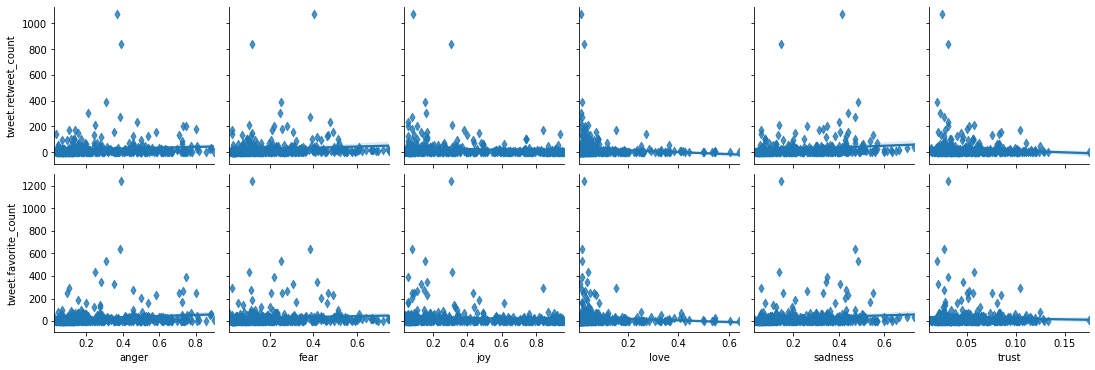

In [109]:
emotionsPop=sns.pairplot(
    ConversationsLean,
    x_vars=["anger","fear","joy","love","sadness","trust"],
    y_vars=["tweet.retweet_count", "tweet.favorite_count"],
    plot_kws=dict(marker="+"),
    diag_kws=dict(fill=False),
    height=2.5,
    markers="d",
    kind="reg")

In [139]:
#There is not apparent relationship shown by the the popularity vs. emotions diagram

In [140]:
#As there is no apparent reason, I decided to look at the most popular users and analyse how emotional were their tweets, I did this by 
#combining the results I got from questions 1 and 2

In [111]:
most_retweets=ConversationsLean.groupby(['stakeholder','tweet.user.screen_name'])['tweet.retweet_count']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5) 

In [112]:
most_retweets

stakeholder tweet.user.screen_name     max
15         NGO        PlasticPollutes  1074.0
11         NGO             Greenpeace   840.0
21  Scientific               Algalita   302.0
13         NGO        NoPlasticStraws   144.0
10         NGO                 5gyres   131.0

In [141]:
#the NGO with the most retweeted tweet was Plastic Pollutes

[(-1.0, 5.0),
 (0.0, 1500.0)]

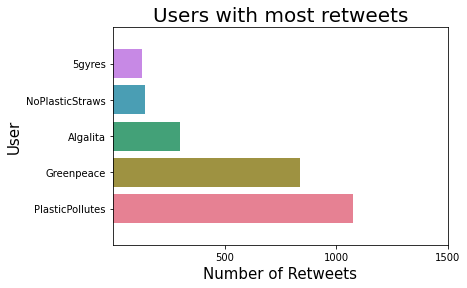

In [113]:
retweetsplot= sns.barplot(x="max", y="tweet.user.screen_name", data=most_retweets,
                        palette="husl")
retweetsplot.set_xlabel("Number of Retweets", fontsize=15),
retweetsplot.set_ylabel("User", fontsize=15),
retweetsplot.set_title("Users with most retweets", fontsize=20)
retweetsplot.set(xlim=(0, 1500),ylim=(-1, 5), xticks=[500, 1000, 1500])

In [142]:
#I decided to then examin the tweets from this organization to see if they were emotional. To do so, I created I dataframe of only Plastic
#Pollutes Tweets; by applying a filter to the main dataframe

In [114]:
PlasticPullutes=ConversationsLean['tweet.user.screen_name']=='PlasticPollutes'

In [115]:
tweetsPP=ConversationsLean[PlasticPullutes]

In [143]:
#Once the dataframe was ready, I took a closer look at the emotions of their tweets, starting with the negative emotions as I already knew from
# question 2 that Plastic Pollutes uses mostly negative emotions in their tweets.

In [186]:
angry_retweetsPP=tweetsPP.groupby('tweet.full_text')['anger']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [145]:
angry_retweetsPP

tweet.full_text  \
27                                                                  BREAKING: @cocacola, @Nestle, @PepsiCo, @MDLZ and @Unilever are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable. #BrandAudit2019 #BreakFreeFromPlastic https://t.co/kufQUxVEV7 https://t.co/0N0A8Bl6HV   
76  Please take a moment to add your name to our petition telling @amazon to stop polluting our planet with single-use plastic packaging. There is no reason they should profit while our planet suffers. #plasticfreeamazon #plasticpollutes #breakfreefromplastic https://t.co/qQnYaTpQIj https://t.co/InikGTGx0P   
22                                                                                                  @Pepsi to launch range of 100% recycled plastic packaging by 2020 after named by @Greenpeace as one of largest corporate polluters in the world. #plasticpollutes #breakfreefromplastic https://t.co/zaAP6trqWe   
53                                                                                                                                              Horrific video shows famed chef pulling plastic trash out of from a fish‚Äôs stomach.\n#plasticpollutes #plastickills https://t.co/uyfZVUlf5Z https://t.co/vPJucRVmiy   
26                          BREAKING: @CocaCola, @Nestle, @PepsiCo , @Unilever and @MDLZ are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable. Read the full @brkfreeplastic  #BrandAudit2019 report: https://t.co/aOvIfmi4vN #breakfreefromplastic https://t.co/SNB8dXl8Os   

        mean  
27  0.885840  
76  0.877616  
22  0.858276  
53  0.819220  
26  0.808471

In [146]:
#By diong this quick analysis on agry tweets I can see that Plastic Pollutes uses negative emotions in their tweets -80% or more in average

In [148]:
#I then proceeded to do the same analysis for each emotion of Plastic Pollutes' tweets

In [149]:
joy_retweetsPP=tweetsPP.groupby('tweet.full_text')['joy']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [150]:
joy_retweetsPP

tweet.full_text  \
49   Happy Halloween from PPC! There are many creative ways to make your Halloween #plasticfree. In fact, we wrote an entire blog post about it! Check out these great ways to enjoy a plastic-free Halloween. Have fun and be safe! üì∏ by @beeswrap https://t.co/5t4YQa1mMS https://t.co/X76mmByh58   
93                                                                                                                                                               Thank you @swellbottle for being a beautiful part of the plastic pollution solution! #BreakFreeFromPlastic https://t.co/gFAvdSwHNo   
50                                                                                 Happy New Year! We hope that 2020 will be a BIG year for the #plasticfree movement. What are your plastic free goals for the new year? #plasticpollutes (Photo by Kyle Fletcher McClure) https://t.co/dlySQkzky3   
57                                                       Huge thanks to @jackjohnson and all of our #BYOBottle partners for all the hard work to reduce single-use plastic in the music industry! @BYOBottle #plasticpollutes #breakfreefromplastic https://t.co/WliusnCjbt https://t.co/Ec21hld5hi   
112                                                                                            What a great Plastic Free July tip from @NatGeo! Carrying your own fork and spoon helps solve the plastic crisis. #plasticfreejuly #plasticpollutes\nhttps://t.co/hjsg5Fk0hL https://t.co/jOsMNLfH5w   

         mean  
49   0.958003  
93   0.953815  
50   0.941883  
57   0.924915  
112  0.923758

In [ ]:
#surprinsingly, Plastic Pollutes uses joy in their tweets - 92% or more in average

In [151]:
fear_retweetsPP=tweetsPP.groupby('tweet.full_text')['fear']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [152]:
fear_retweetsPP

tweet.full_text  \
31   By 2050, the greenhouse gas emissions from plastic could reach over 10-13 percent of our entire remaining carbon budget.  We urgently need to #breakfreefromplastic to prevent #climatebreakdown. Learn more: https://t.co/MV7e3mZrgb  #COP25 #ClimateAction #plasticpollutes https://t.co/WNwI3SfHqM   
1                                              "Microplastics have invaded the food supply." Humans are eating and drinking microplastics, which has scientists concerned about the long-term effects on the human body. #plasticpollutes #plasticispoison https://t.co/GuHQ8Xg1jA https://t.co/YwD2EideJ5   
89                                                                                                                  Start of scientific research into the health risks of microplastics: Does microplastic make us sick? #plasticpollutes #plasticispoison https://t.co/sSMIhvztpH https://t.co/eqbNV68e6m   
118                                    Women exposed simultaneously to stress and plastic additives late in pregnancy are at increased risk for premature birth, according to a study by Rutgers and other institutions. #plasticispoison #plasticpollutes https://t.co/HAuPpVbMPk https://t.co/S0qcDVyQ3u   
96   The global plastic crisis has invaded a sacred sanctuary in Japan. Nine deer in Nara Park that have died since March were revealed to have massive amounts of plastic bags and food wrappers in their digestive tract. #plasticpollutes #plastickills https://t.co/DD3aA9YAbi https://t.co/dVnze36bSy   

         mean  
31   0.742850  
1    0.741325  
89   0.693961  
118  0.684317  
96   0.673362

In [176]:
#Plastic Pollutes uses fear in their tweets - 67% or more in average. 

In [153]:
love_retweetsPP=tweetsPP.groupby('tweet.full_text')['love']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [154]:
love_retweetsPP

tweet.full_text  \
93                                                                                                                                                               Thank you @swellbottle for being a beautiful part of the plastic pollution solution! #BreakFreeFromPlastic https://t.co/gFAvdSwHNo   
49   Happy Halloween from PPC! There are many creative ways to make your Halloween #plasticfree. In fact, we wrote an entire blog post about it! Check out these great ways to enjoy a plastic-free Halloween. Have fun and be safe! üì∏ by @beeswrap https://t.co/5t4YQa1mMS https://t.co/X76mmByh58   
50                                                                                 Happy New Year! We hope that 2020 will be a BIG year for the #plasticfree movement. What are your plastic free goals for the new year? #plasticpollutes (Photo by Kyle Fletcher McClure) https://t.co/dlySQkzky3   
57                                                       Huge thanks to @jackjohnson and all of our #BYOBottle partners for all the hard work to reduce single-use plastic in the music industry! @BYOBottle #plasticpollutes #breakfreefromplastic https://t.co/WliusnCjbt https://t.co/Ec21hld5hi   
112                                                                                            What a great Plastic Free July tip from @NatGeo! Carrying your own fork and spoon helps solve the plastic crisis. #plasticfreejuly #plasticpollutes\nhttps://t.co/hjsg5Fk0hL https://t.co/jOsMNLfH5w   

         mean  
93   0.545470  
49   0.496723  
50   0.419243  
57   0.384344  
112  0.331600

In [155]:
#Plastic Pollutes does not tend to use joy in their tweets - only 33% to 54% in average. Not as significant as others

In [158]:
sad_retweetsPP=tweetsPP.groupby('tweet.full_text')['sadness']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [159]:
sad_retweetsPP

tweet.full_text  \
98                                                                                                      This is so sad: 'Baby turtle dies after eating 104 pieces of plastic off the Florida coast.' #plasticpollutes #plastickills https://t.co/qokZC2lpaG https://t.co/mvrVTPCtQl   
88                                                                                                                         So sad: Crabs in Thames found with stomachs ‚Äòcompletely full of plastic‚Äô. #plasticpollutes #plastickills https://t.co/hKfMUgUm4G https://t.co/9z6lbKx2X9   
40                                                                              Earlier this week a whale washed up in the Philippines with 40 kilograms of plastic in its stomach. Heartbreaking. #plasticpollutes #plastickills \nhttps://t.co/DCcOtk8gqW https://t.co/SDjhZ6U0ZL   
113  When Lily was a child, their house was surrounded by forests. Now their roads are littered with flakes of foreign plastic.\nRead @GAIAnoburn ‚Äòs report from the frontlines of the #plastic waste trade:\nhttps://t.co/H0HGbOKKjd #breakfreefromplastic https://t.co/kvZr7gSaKY   
109                                                                                                      We all know that plastic is bad for the environment, but what is it doing to our health? #plasticpollutes #plasticispoison https://t.co/Hq5IEdEwrJ https://t.co/8EGCgfh0BB   

         mean  
98   0.729990  
88   0.700145  
40   0.651816  
113  0.631037  
109  0.613005

In [160]:
#Plastic Pollutes uses sadness in their tweets - 61% or more in average. 

Text(0.5, 1.0, 'Users with the most retweets')

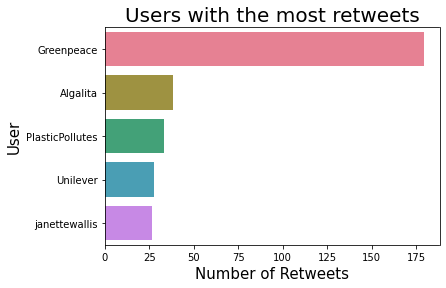

In [166]:
averageretweetsplot= sns.barplot(x="mean", y="tweet.user.screen_name", data=average_retweets,
                        palette="husl")
averageretweetsplot.set_xlabel("Number of Retweets", fontsize=15),
averageretweetsplot.set_ylabel("User", fontsize=15),
averageretweetsplot.set_title("Users with the most retweets", fontsize=20)

In [167]:
#It was important to also look at Greenpeace as it clearly was one of the most popular, if not the most popular user - in average 

In [162]:
Greenpeace=ConversationsLean['tweet.user.screen_name']=='Greenpeace'

In [164]:
tweetsGP=ConversationsLean[Greenpeace]

In [168]:
angry_retweetsGP=tweetsGP.groupby('tweet.full_text')['anger']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [169]:
angry_retweetsGP

tweet.full_text  \
4       BREAKING: @CocaCola, @Nestle, @PepsiCo, @MDLZ and @Unilever¬†are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable.\n\nRead the full @brkfreeplastic #BrandAudit2019 report: https://t.co/7ZWDWuo8iH\n\n#BreakFreeFromPlastic https://t.co/CXaTp53YcR   
17                                 We can't have companies publicly saying they want to end plastic pollution, while still financially supporting an association that lobbies for our continued reliance on throwaway plastics. \n\nWe just can't. \n#BreakFreeFromPlastic\nhttps://t.co/DWbfsugsaQ   
0   "Coca-Cola‚Äôs dubious distinction of being the top global contributor of plastic waste for two consecutive years runs counter to the company‚Äôs carefully curated public image as an environmental leader." \n\n#BreakFreeFromPlastic &gt;&gt; https://t.co/GEa1Iq0hNg\n\nhttps://t.co/bYiygD4VNb   
3                                                                  According to the industry, plastics are indispensable and the real problem is littering consumers and poor waste-management systems.\n\nIs it? Not really. \n\n#BreakFreeFromPlastic #ReuseRevolution\n\nhttps://t.co/jmGDyczK5M   
15         Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nWhat's worse is that these plastics have been found in our food, and drinking water.\n\n#BreakFreeFromPlastic‚Ä¶   

        mean  
4   0.799517  
17  0.748713  
0   0.730127  
3   0.725294  
15  0.706069

In [170]:
#Greenpeace uses negative emotions in their tweets - 70% or more in average

In [171]:
joy_retweetsGP=tweetsGP.groupby('tweet.full_text')['joy']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [172]:
joy_retweetsGP

tweet.full_text  \
21  You‚Äôre doing more good than you might think when you use reusables instead of throwaway plastic packaging. Join the #ReuseRevolution and push companies around the world to #BreakFreeFromPlastic!\n\nhttps://t.co/Onj591Imdd https://t.co/Irie87aKHa   
7                                                                                                                 Just because something is recyclable doesn‚Äôt mean it will be recycled. Refill and reuse. #breakfreefromplastics https://t.co/FCKPRfLJry   
1                                                       "Instead of the usual diet of fish, adult birds have been feeding their chicks with small pieces of plastic" üíî\n\n#BreakFreeFromPlastic &gt;&gt; https://t.co/EWLhDg44rN\nhttps://t.co/steGk6Vj0c   
2                                                                  A teeny, tiny peek into the 8 million tonnes of plastic that enter our oceans every. single. year üòí\n\n#BreakFreeFromPlastic &gt;&gt; https://t.co/EWLhDg44rN\nhttps://t.co/y8Z4KwuF5N   
16                                                                                     Want to help fight plastic pollution next year?\nHere‚Äôs what you can do in your community!\n#BreakFreeFromPlastic\nhttps://t.co/7VsKA9ELsV https://t.co/4YNi8nNhQu   

        mean  
21  0.842897  
7   0.613726  
1   0.465316  
2   0.439919  
16  0.430997

In [173]:
# Greenpeace uses joy in their tweets - 42% or more in average, but not as much.

In [174]:
fear_retweetsGP=tweetsGP.groupby('tweet.full_text')['fear']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5) 

In [175]:
fear_retweetsGP

tweet.full_text  \
14  Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nThese plastics have been found in our food, and drinking water. ü§¢\n\n#BreakFreeFromPlastic\n\nhttps://t.co/5Af0DqVOHo   
15         Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nWhat's worse is that these plastics have been found in our food, and drinking water.\n\n#BreakFreeFromPlastic‚Ä¶   
6                                                                                                                                                                             Get the frightening breakdown on rising global plastic consumption üëáüèº#BreakFreeFromPlastic\n\nhttps://t.co/emAJ0tP63B   
19                                                                                                                                                                                 We can‚Äôt recycle our way out of this plastic crisis. We need to #BreakFreeFromPlastic. \nhttps://t.co/mzN438Dayr   
18                                                                                                                                                     We can‚Äôt recycle our way out of the plastic pollution crisis. We have to #BreakFreeFromPlastic!  (via @storyofstuff) https://t.co/2ZZ2710S6l   

        mean  
14  0.490710  
15  0.467734  
6   0.463596  
19  0.436249  
18  0.384878

In [177]:
#Greenpeace uses very little fear in their tweets - 38% to 49% in average. 

In [178]:
love_retweetsGP=tweetsGP.groupby('tweet.full_text')['love']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [179]:
love_retweetsGP

tweet.full_text  \
21                                            You‚Äôre doing more good than you might think when you use reusables instead of throwaway plastic packaging. Join the #ReuseRevolution and push companies around the world to #BreakFreeFromPlastic!\n\nhttps://t.co/Onj591Imdd https://t.co/Irie87aKHa   
7                                                                                                                                                           Just because something is recyclable doesn‚Äôt mean it will be recycled. Refill and reuse. #breakfreefromplastics https://t.co/FCKPRfLJry   
14  Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nThese plastics have been found in our food, and drinking water. ü§¢\n\n#BreakFreeFromPlastic\n\nhttps://t.co/5Af0DqVOHo   
16                                                                                                                               Want to help fight plastic pollution next year?\nHere‚Äôs what you can do in your community!\n#BreakFreeFromPlastic\nhttps://t.co/7VsKA9ELsV https://t.co/4YNi8nNhQu   
15         Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nWhat's worse is that these plastics have been found in our food, and drinking water.\n\n#BreakFreeFromPlastic‚Ä¶   

        mean  
21  0.152183  
7   0.086591  
14  0.073630  
16  0.066467  
15  0.048535

In [180]:
#Greenpeace uses little to no love in their tweets 

In [181]:
sad_retweetsGP=tweetsGP.groupby('tweet.full_text')['sadness']\
                            .mean() \
                            .reset_index(name='mean') \
                            .sort_values(['mean'], ascending=False)\
                            .head(5)

In [183]:
sad_retweetsGP

tweet.full_text  \
15         Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nWhat's worse is that these plastics have been found in our food, and drinking water.\n\n#BreakFreeFromPlastic‚Ä¶   
3                                                                  According to the industry, plastics are indispensable and the real problem is littering consumers and poor waste-management systems.\n\nIs it? Not really. \n\n#BreakFreeFromPlastic #ReuseRevolution\n\nhttps://t.co/jmGDyczK5M   
9                                                                                                                                                 Over time, humans have discarded more than 6.3 billion metric tons of plastic.\n\nThat ends here. #BreakFreeFromPlastic \nhttps://t.co/zqadgzwxUY   
18                                                                                                                                                     We can‚Äôt recycle our way out of the plastic pollution crisis. We have to #BreakFreeFromPlastic!  (via @storyofstuff) https://t.co/2ZZ2710S6l   
14  Tiny bits of plastic were found in nine major rivers in Europe, in 100% of tests. \n\nMicroplastics often absorb pollutants and become highly toxic. \n\nPretty gross.\n\nThese plastics have been found in our food, and drinking water. ü§¢\n\n#BreakFreeFromPlastic\n\nhttps://t.co/5Af0DqVOHo   

        mean  
15  0.549981  
3   0.538253  
9   0.483020  
18  0.470035  
14  0.439867

In [191]:
#Greenpace uses little sadness in their tweets - 43% to 55% in average.

In [203]:
#after doing quick analysis I could see that the most popular users definitely used emotions as part of their tweets, which could indicate
#there was a relationship between emotions and popularity. But I was not 100% sure as I do not have the retweet or favourite count of the most
#emotional tweets... therefore I decided to look for this information.

In [214]:
#I first looked at the angriest tweet of Greenpeace. To do it by printing the row of this tweet

In [212]:
print(tweetsGP.loc[[114]])

     Unnamed: 0            tweet.created_at      tweet.id  \
114          68  2019-10-23 14:20:00.000000  1.187011e+18   

                                                                                                                                                                                                                                                                                 tweet.full_text  \
114  BREAKING: @CocaCola, @Nestle, @PepsiCo, @MDLZ and @Unilever¬†are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable.\n\nRead the full @brkfreeplastic #BrandAudit2019 report: https://t.co/7ZWDWuo8iH\n\n#BreakFreeFromPlastic https://t.co/CXaTp53YcR   

                                                                                                                                                                                                                                                                                                   

In [213]:
#I can see from this that this tweet even though is very angry, it does not have a very high retweet count (only 180) nor favourite count
#(only 247).

In [242]:
tweetsGP['tweet.full_text'].str.startswith('You‚Äôre doing more good than you might think when you use reusables instead of throwaway plastic packaging. Join the #ReuseRevolution and push companies around the world to')

105    False
106    False
107     True
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
289    False
290    False
291    False
Name: tweet.full_text, dtype: bool

In [243]:
print(tweetsGP.loc[[107]])

     Unnamed: 0            tweet.created_at      tweet.id  \
107          61  2019-12-07 22:25:07.000000  1.203440e+18   

                                                                                                                                                                                                                                           tweet.full_text  \
107  You‚Äôre doing more good than you might think when you use reusables instead of throwaway plastic packaging. Join the #ReuseRevolution and push companies around the world to #BreakFreeFromPlastic!\n\nhttps://t.co/Onj591Imdd https://t.co/Irie87aKHa   

                                                                                                                                                                                                                                                                                                                                                                              

In [245]:
#I can see from this that this tweet even though uses high level of joy, it does not have a very high retweet count (only 175) nor favourite 
#count (only 293).

In [246]:
#I can conclude there is a relationship but it is not strong.

## Task 4. Develop and apply a function which: (1) extracts ALL the hashtags from the column 'tweet.full_text', (2) saves the result as a new column (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider lambda functions applied to a dataframe

### Tip: refer to the module labs for examples on how to use REGEX in the context of pandas dataframes

In [215]:
#I will use Regex and lambda function to do this task. For it, I need to import Regex

In [216]:
import re

In [217]:
#I will call my new column 'hashtags_extracted'

In [121]:
ConversationsLean['hashtags_extracted']=ConversationsLean['tweet.full_text'].apply(lambda x:re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)'    , x))

In [218]:
#Once the operation is done I call a sample to double check it works fine

In [122]:
ConversationsLean.sample(3)

Unnamed: 0            tweet.created_at      tweet.id  \
130          84  2019-07-18 20:41:02.000000  1.151955e+18   
392          46  2019-08-02 08:30:21.000000  1.157207e+18   
246         200  2012-05-03 23:42:19.000000  1.981958e+17   

                                                                                                                                                                                                                                                                                                tweet.full_text  \
130  No community should be polluted or exposed to harmful chemical substances from toxic food packaging. To #BreakFreeFromPlastic this July and beyond, let‚Äôs ‚Äúunwrap‚Äù the health risks of plastic and food packaging chemicals. Follow @brkfreeplastic for actions to take all month! https://t.co/MjDiBwgQnt   
392                                                                                                                                                RT @PlasticPollutes: How plastic pollution threatens Myanmar‚Äôs baby turtles. #plasticpollutes #plastickills\nhttps://t.co/2zSYecVE1p https://t.co/ICKhPrNmWI   
246                                                                                                                                                                                 Thank you!  RT @EarthShare A book that shows you how to rid plastic from your life by @plasticfreebeth http://t.co/GlgjRTQL   

                                                                                                                                                                                                                                                                                                                                                                                                      tweet.entities  \
130  {'hashtags': [{'text': 'BreakFreeFromPlastic', 'indices': [104, 125]}], 'symbols': [], 'user_mentions': [{'screen_name': 'brkfreeplastic', 'name': 'breakfreefromplastic', 'id': 775875252555436032, 'id_str': '775875252555436032', 'indices': [228, 243]}], 'urls': [], 'media': [{'id': 1151955034151587840, 'id_str': '1151955034151587840', 'indices': [275, 298], 'media_url': 'http://pbs.twimg.com/m...   
392  {'hashtags': [{'text': 'plasticpollutes', 'indices': [77, 93]}, {'text': 'plastickills', 'indices': [94, 107]}], 'symbols': [], 'user_mentions': [{'screen_name': 'PlasticPollutes', 'name': 'Plastic Pollutes', 'id': 71310291, 'id_str': '71310291', 'indices': [3, 19]}], 'urls': [{'url': 'https://t.co/2zSYecVE1p', 'expanded_url': 'http://ow.ly/nTbN30pgbbb', 'display_url': 'ow.ly/nTbN30pgbbb', 'in...   
246  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'EarthShare', 'name': 'EarthShare', 'id': 16957613, 'id_str': '16957613', 'indices': [15, 26]}, {'screen_name': 'PlasticfreeBeth', 'name': 'Beth Terry', 'id': 15071040, 'id_str': '15071040', 'indices': [86, 102]}], 'urls': [{'url': 'http://t.co/GlgjRTQL', 'expanded_url': 'http://ow.ly/aD2E4', 'display_url': 'ow.ly/aD2E4', 'indic...   

     tweet.user.id tweet.user.screen_name  tweet.user.followers_count  \
130       85732762                 5gyres                       24165   
392      380346763        EnvirHealthNews                        9158   
246       15071040        PlasticfreeBeth                       11649   

     tweet.user.friends_count  tweet.user.favourites_count  \
130                      4022                         2025   
392                      1771                         2941   
246                      1469                         1371   

     tweet.user.statuses_count  tweet.retweet_count  tweet.favorite_count  \
130                       6190                 15.0                  24.0   
392                      33791                  2.0                   2.0   
246                       8443                  5.0                   0.0   

     tweet.favorited  tweet.retweeted t

In [ ]:
#Once the hastags are all extracted in just one column, I got quriuos and wanted to konw which stakeholders used the most hashtags. 

In [223]:
top_stakeholsers_hashtags_count=ConversationsLean.groupby('stakeholder')['hashtags_extracted']\
                            .count() \
                            .reset_index(name='count') \
                            .sort_values(['count'], ascending=False)\
                            .head(5)

In [225]:
top_stakeholsers_hashtags_count

stakeholder  count
2               NGO    241
0            Artist    104
3  OtherInstitution     51
4        Scientific     24
1     Multinational     20

In [227]:
#The stakeholser that uses the most hashtags are NGOs

In [235]:
top_hashtags=ConversationsLean.groupby('stakeholder')['hashtags_extracted']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [236]:
top_hashtags

stakeholder  \
0            Artist   
2               NGO   
1     Multinational   
3  OtherInstitution   
4        Scientific   

                                                          max  
0                                [#wastedialog, #plasticfree]  
2                                 [#viralvideo, #plasticfree]  
1  [#veolia, #nestle, #BeatPlasticPolution, #circulareconomy]  
3        [#ukplasticspact, #changeplasticforgood, #recycling]  
4                                                [#recycling]

In [237]:
#By using the max function I can see that even though NGOs use the most hashtags, they do not tend to pile lots of them together in one tweet

## Task 5. what are the differences between stakeholders ?   (30%)

### Tip: explore differences in terms of emotions, popularity, hashtags used, number of tweets,etc

In [239]:
ConversationsLean.head(0)

Empty DataFrame
Columns: [Unnamed: 0, tweet.created_at, tweet.id, tweet.full_text, tweet.entities, tweet.user.id, tweet.user.screen_name, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.retweet_count, tweet.favorite_count, tweet.favorited, tweet.retweeted, tweet.lang, fetchedAt, tweet.full_text_clean, anger, fear, joy, love, sadness, trust, identity_hate, insult, obscene, severe_toxic, threat, toxic, stakeholder, hashtags_extracted]
Index: []

In [240]:
differences=ConversationsLean.groupby('stakeholder')\
                            ['tweet.favorite_count','tweet.retweet_count','anger','fear','joy','love','sadness','trust']\
                            .mean() \
                            .reset_index()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [241]:
differences

stakeholder  tweet.favorite_count  tweet.retweet_count     anger  \
0            Artist              1.403846             2.701923  0.191531   
1     Multinational             52.850000            19.550000  0.158001   
2               NGO             46.456432            38.680498  0.356121   
3  OtherInstitution             12.411765            10.039216  0.207091   
4        Scientific              1.250000            28.333333  0.283057   

       fear       joy      love   sadness     trust  
0  0.142912  0.511195  0.123589  0.179675  0.054033  
1  0.157787  0.523263  0.105483  0.160258  0.063770  
2  0.245599  0.293706  0.063486  0.272420  0.048228  
3  0.169765  0.394409  0.059978  0.188679  0.056795  
4  0.160679  0.407954  0.098758  0.244664  0.051185

In [247]:
#we can say the main difference 

## Task 6. what are your recommendations for Coca Cola as far as social media is concerned ?   (20%)

In [126]:
##Misktes

In [188]:
angry_retweetsPPaverage=tweetsPP.groupby('tweet.full_text')['anger',"tweet.retweet_count", "tweet.favorite_count"]\
                            .mean() \
                            .reset_index() \
                            .head(5) 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [127]:
test=ConversationsLean.groupby('stakeholder')['trust']\
                            .max() \
                            .reset_index(name='max') \
                            .sort_values(['max'], ascending=False)\
                            .head(5)

In [128]:
ConversationsLean['obscene'].sample(1)

208    0.004837
Name: obscene, dtype: float64

In [129]:
ConversationsLean['toxic'].sample(1)

350    0.016134
Name: toxic, dtype: float64

In [130]:
ConversationsLean['threat'].sample(1)

298    0.002273
Name: threat, dtype: float64

In [131]:
ConversationsLean['severe_toxic'].sample(1)

94    0.002093
Name: severe_toxic, dtype: float64

In [132]:
ConversationsLean['identity_hate'].sample(1)

331    0.002267
Name: identity_hate, dtype: float64

In [133]:
ConversationsLean['insult'].sample(1)

20    0.002734
Name: insult, dtype: float64

In [134]:
ConversationsLean.head(0)

Empty DataFrame
Columns: [Unnamed: 0, tweet.created_at, tweet.id, tweet.full_text, tweet.entities, tweet.user.id, tweet.user.screen_name, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.retweet_count, tweet.favorite_count, tweet.favorited, tweet.retweeted, tweet.lang, fetchedAt, tweet.full_text_clean, anger, fear, joy, love, sadness, trust, identity_hate, insult, obscene, severe_toxic, threat, toxic, stakeholder, hashtags_extracted]
Index: []

In [135]:
ConversationsLean.sort_values(by='tweet.retweeted', ascending=False)

Unnamed: 0            tweet.created_at      tweet.id  \
0             0  2019-03-05 00:55:05.000000  1.102734e+18   
294         248  2020-01-14 00:45:03.000000  1.216884e+18   
305         259  2018-06-05 23:14:49.000000  1.004140e+18   
304         258  2019-02-28 12:49:06.000000  1.101102e+18   
303         257  2018-12-08 02:25:47.000000  1.071229e+18   
..          ...                         ...           ...   
145          99  2018-06-08 19:13:33.000000  1.005166e+18   
144          98  2018-06-09 19:10:07.000000  1.005527e+18   
143          97  2018-06-09 19:10:19.000000  1.005528e+18   
142          96  2018-06-25 21:47:24.000000  1.011365e+18   
446          20  2018-06-06 07:15:36.000000  1.004261e+18   

                                                                                                                                                                                                                                                                                                     tweet.full_text  \
0                                                                    The Recycling Myth. ‚ÄúI hear the excuse all the time, ‚ÄòI use single-use plastic, but I recycle it, so it‚Äôs OK.‚Äô Unfortunately, that is not the truth.‚Äù #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN   
294  Please take a moment to add your name to our petition telling @amazon to stop polluting our planet with single-use plastic packaging. There is no reason they should profit while our planet suffers. #plasticfreeamazon #plasticpollutes #breakfreefromplastic https://t.co/qQnYaTpQIj https://t.co/InikGTGx0P   
305                                                                                                         Even more so today- proud to be @TreadRightOrg ambassador as we announce phase out of all single use plastics across @travelTTC brands #travel #plasticfree #WorldEnvironmentDay https://t.co/F7kh6rw43K   
304                                                                                                                                                                     RT @GAIAnoburn: "The only thing dumber than burning single-use plastics is making them in the first place." #breakfreefromplastic https://t‚Ä¶   
303                                                                                                                                                                 RT @aplastic_planet: New #market stall sells #plasticfree products \n\nMarkets .... plastic-free .... what‚Äôs not to love üíöüíôüíöüíô\n\nhttps://t.co/n‚Ä¶   
..                                                                                                                                                                                                                                                                                                               ...   
145       @sophieuliano A7: Waste to energy contributes to global warming, undermines waste reduction &amp; recycling programs, and encourages the continued production of cheap plastic goods. It continues the cycle and we remain trapped in plastic pollution. #sciencetosolutions #5gyres #breakfreefromplastic   
144                                                           "Lifestraw filters remove 99.999% of microplastics from drinking water in independent lab testing."\n\nAs partners on our Expedition this summer, we will be using their filter straw system while traveling in order to keep our voyage #plasticfree!   
143                                   "Lifestraw filters remove 99.999% of microplastics from drinking water in independent lab testing."\n\nAs partners on our Expedition this summer, we will be using their filter straw system while traveling in order to keep our voyage #plasticfree! https://t.co/SwQ8CetVXT   
142                                                              What's YOUR Story of Plastic? \n\nSNEAK PEEK! #breakfreefro

In [136]:
ConversationsLean.sort_values(by='tweet.user.followers_count', ascending=False)

Unnamed: 0            tweet.created_at      tweet.id  \
291         245  2020-01-06 18:30:07.000000  1.214253e+18   
290         244  2020-01-07 22:29:38.000000  1.214675e+18   
289         243  2020-01-09 09:24:05.000000  1.215203e+18   
111          65  2019-11-09 16:10:04.000000  1.193199e+18   
117          71  2019-09-08 09:00:26.000000  1.170623e+18   
..          ...                         ...           ...   
266         220  2012-10-01 19:21:54.000000  2.528508e+17   
37           37  2016-12-13 20:48:10.000000  8.087755e+17   
310         264  2016-02-18 16:50:03.000000  7.003616e+17   
272         226  2015-01-31 00:50:52.000000  5.613257e+17   
35           35  2011-12-23 14:14:59.000000  1.502178e+17   

                                                                                                                                                                                                                                                                               tweet.full_text  \
291                                                                                                                                       The plastic pollution we see in the ocean is just the tip of the iceberg\nLet‚Äôs make 2020 the year we #breakfreefromplastic\nhttps://t.co/TQ4s0dIhYG   
290  We know change is happening when @GiantEagle, a supermarket with almost 500 stores in the US, commits to eliminating single-use plastics in 5 years.\n\nChallenge your local supermarket to join the movement and #breakfreefromplastic: https://t.co/euBLOb0Jxq\nhttps://t.co/4LUSxFn4xH   
289                                                                                                                                              RT @brkfreeplastic: Plastic pollution does not begin when plastic enters the environment. The #breakfreefromplastic \nmovement in Europe add‚Ä¶   
111                                                                                                                                          Over time, humans have discarded more than 6.3 billion metric tons of plastic.\n\nThat ends here. #BreakFreeFromPlastic \nhttps://t.co/zqadgzwxUY   
117                                                                                                                                                                                              Don‚Äôt just recycle ‚Äî reduce and reuse first. \n#BreakFreeFromPlastic\nhttps://t.co/FwK35C4E9U   
..                                                                                                                                                                                                                                                                                         ...   
266                                                                                                                                                   RT @plasticfreebeth: Love this! RT @Mr_htcht Canvas bag giveaway in Chinatown. Goodbye pink plastic bags! http://t.co/zbZ0w0FD #BYObagSF   
37                                                                                                                                                 @CwHumanEcology No amount of recycling will ever get ahead of production...oceans bear witness to all the #plasticl that escapes #recycling   
310                                                                                                                                               diving toolkit 4 cleaning ocean plastic in 12 languages! #plasticfreeisland @PlasticPollutes https://t.co/f7G76iX7Vw https://t.co/RO4PG1pgYt   
272                                                                                                                                                   5.25 trillion Pieces of plastic pollute the worlds oceans. Prevention Through Education. Support BPM #plasticfree http://t.co/e2xpifcQ4F   
35                                                                        

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

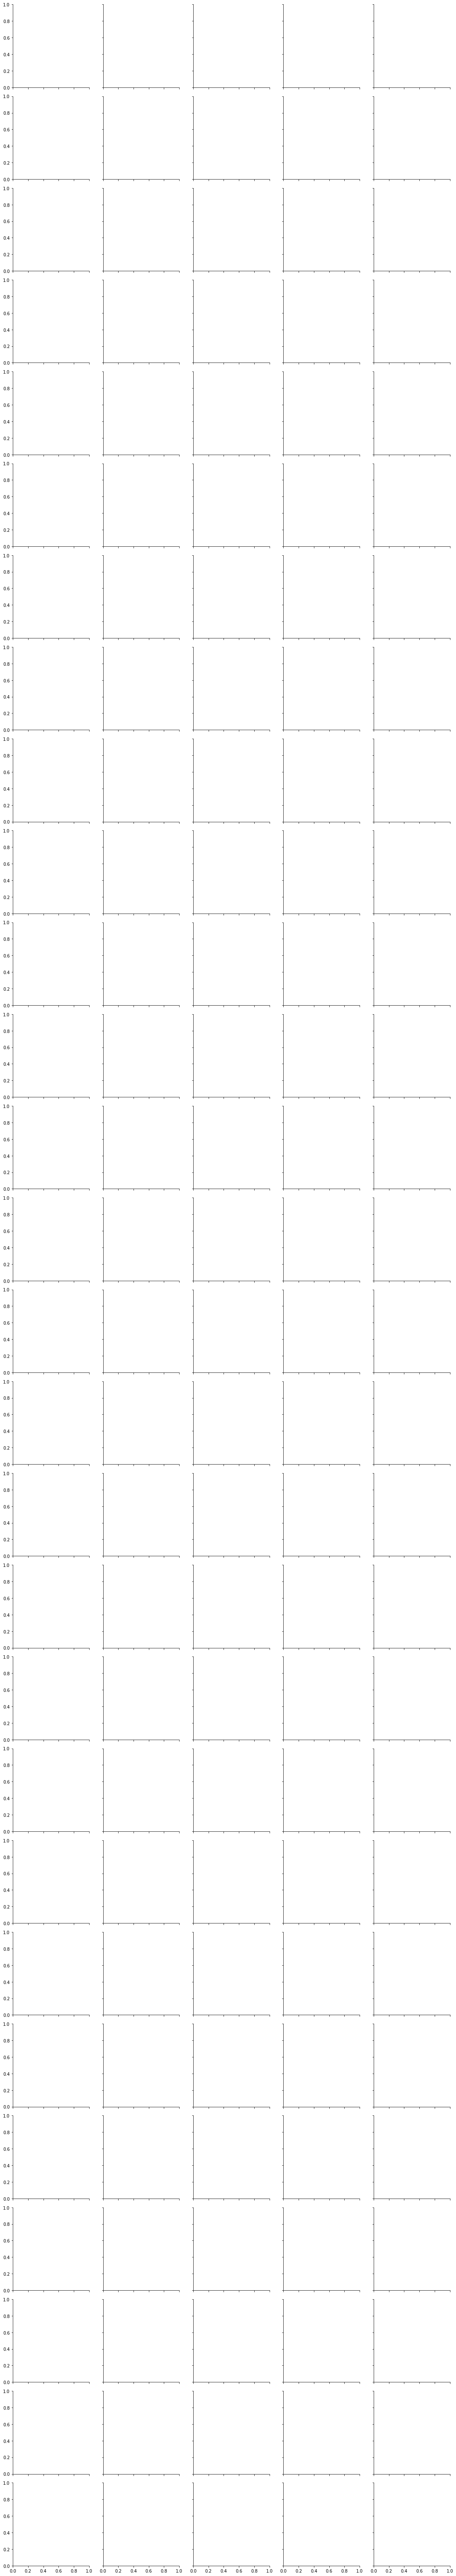

In [137]:
g = sns.FacetGrid(ConversationsLean, col="stakeholder",  row="tweet.user.screen_name")
g.map_dataframe(sns.scatterplot, x="tweet.favorite_count")

In [ ]:
g = sns.FacetGrid(ConversationsLean, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
g.savefig("facet_plot.png")

In [ ]:
feelingsplot = sns.catplot(x="stakeholder", col_wrap=6,
                data=feelings,
                kind="count")

In [ ]:
feelingsplot = sns.catplot(x="stakeholder", y="pulse"hue="stakeholder", data=fstakeholder)

In [ ]:
sns.lineplot(data=ConversationsLean, x="timepoint", y="signal", hue="stakeholder")